In [1]:
!pip install patchify

In [2]:
!pip install matplotlib

In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
# IMPORTS
import matplotlib.image
import math
import random 
import PIL
from PIL import Image, ImageDraw
import numpy as np
from itertools import chain
import cv2
from matplotlib import pyplot as plt
import subprocess
import threading 
import sys
from os import path
from keras.utils import normalize
from patchify import patchify, unpatchify


import os

In [12]:
def reconstruct_images(patches):
  reconstructed_image = unpatchify(patches, (7680,7680))
  return reconstructed_image

In [13]:
def get_image_source_list(source):
   l=os.listdir(source)
   return l
def return_slised_image(large_image):
  patches = patchify(large_image, (512, 512), step=512)  
  return patches

In [14]:
def convert_grey(img):
  return img.convert("L")

In [15]:
def get_pixels(images)  :
  l=[]
  for x in range(512):
    for y in range(512):
      pos = (x, y)
      rgba = images[x][y]
      if rgba==0  :
        l.append((x,y))
  return l

In [16]:
def get_neighboring_pixel(img, x, y, current_window_size):
  """ 
  Dynamically selects non-missing points within a radius of the target missing pixel. As selection fails, radius size increases automatically.
  Inputs: img (numpy array)
          x, y: coordinates of the target missing pixel to fill
  Outputs: dynamically-selected non-missing pixel (x_neighbor, y_neighbor)
  """
  x_rand, y_rand = 0,0
  max_num_tries = 10000000000
  max_tries_per_neighbourhood = 1000
  neighbourhood_size_increment = 50
  current_window_size = 10
  total_tries = 0
  for _ in range(math.ceil(max_num_tries/max_tries_per_neighbourhood)):
    for _ in range(max_tries_per_neighbourhood):
      min_x = max(0, x-current_window_size)
      max_x = min(512, x+current_window_size)
      min_y = max(0, y-current_window_size)
      max_y = min(512, y+current_window_size)
      x_rand = random.randint(min_x, max_x-1)
      y_rand = random.randint(min_y, max_y-1)
      total_tries += 1
      if not img[x_rand][y_rand]==0 :
        return x_rand, y_rand
    current_window_size += neighbourhood_size_increment

  return x_rand, y_rand

In [17]:
def fill_swath_with_neighboring_pixel(img, left=10, right=100, top=10, bottom=100, color = {0,0,0}, current_window_size = 10):
  """ 
  Filling method 3: 
  Input: image with missing data (numpy array)
  Output: numpy array with missing data filled by random RGB values from non-missing pixel portions of the image selected with probability inversely proportional to distance
  """
  img_with_neighbor_filled = np.array(img.copy())
  l=get_pixels(img)
  for k in l:
    x,y=k
    x_rand, y_rand = get_neighboring_pixel(img, x, y, current_window_size)
    if x >= left and x <= right and y >= top and y <= bottom:
      img_with_neighbor_filled[x][y] = img[x_rand][y_rand]
  return img_with_neighbor_filled

In [18]:
l=get_image_source_list(r"C:\Users\youss\Downloads\CS\original_images\mine")# 7ote dossier yali fih original photo imta3kim
source=r"C:\Users\youss\Downloads\CS\original_images\mine"  # w lina zada 7ot nafse 
good_imagesss=[]

done : 0 0
done : 0 1
done : 0 2
done : 0 3
done : 0 4
done : 0 5
done : 0 6
done : 0 7
done : 0 8
done : 0 9
done : 0 10
done : 0 11
done : 0 12
done : 0 13
done : 0 14
done : 1 0
done : 1 1
done : 1 2
done : 1 3
done : 1 4
done : 1 5
done : 1 6
done : 1 7
done : 1 8
done : 1 9
done : 1 10
done : 1 11
done : 1 12
done : 1 13
done : 1 14
done : 2 0
done : 2 1
done : 2 2
done : 2 3
done : 2 4
done : 2 5
done : 2 6
done : 2 7
done : 2 8
done : 2 9
done : 2 10
done : 2 11
done : 2 12
done : 2 13
done : 2 14
done : 3 0
done : 3 1
done : 3 2
done : 3 3
done : 3 4
done : 3 5
done : 3 6
done : 3 7
done : 3 8
done : 3 9
done : 3 10
done : 3 11
done : 3 12
done : 3 13
done : 3 14
done : 4 0
done : 4 1
done : 4 2
done : 4 3
done : 4 4
done : 4 5
done : 4 6
done : 4 7
done : 4 8
done : 4 9
done : 4 10
done : 4 11
done : 4 12
done : 4 13
done : 4 14
done : 5 0
done : 5 1
done : 5 2
done : 5 3
done : 5 4
done : 5 5
done : 5 6
done : 5 7
done : 5 8
done : 5 9
done : 5 10
done : 5 11
done : 5 12
done

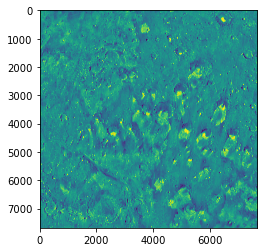

In [20]:
for img in l:
  large_image=Image.open(os.path.join(source,img))
  im=convert_grey(large_image)
  patches=return_slised_image(np.array(im))
  for i in range(15):
     for j in range(15):
       patches[i][j]=fill_swath_with_neighboring_pixel(patches[i][j], left=0, right=511,top=0, bottom=511, color={0,0,0}, current_window_size=10)
       print("done :",i,j)
  good_image=reconstruct_images(patches)
  good_imagesss.append(good_image)
  plt.imshow(good_image)
  matplotlib.image.imsave(os.path.join(source,img+"good_image.png"), good_image)

In [21]:
l[0]

'thm_dir_N00_180.png'